In [16]:
using Plots
using BandedMatrices
include("./phase.jl")

ham_sf_pbc (generic function with 1 method)

In [42]:
L = 3001

H = ham_sf_obc(L = L, rng = MersenneTwister())
H = BandedMatrix(H, (2, 2));

In [43]:
@time vals, vecs = eigen(Hermitian(Matrix(H)), L÷2+1:L÷2+1);

  3.785487 seconds (28 allocations: 414.667 MiB, 4.33% gc time)


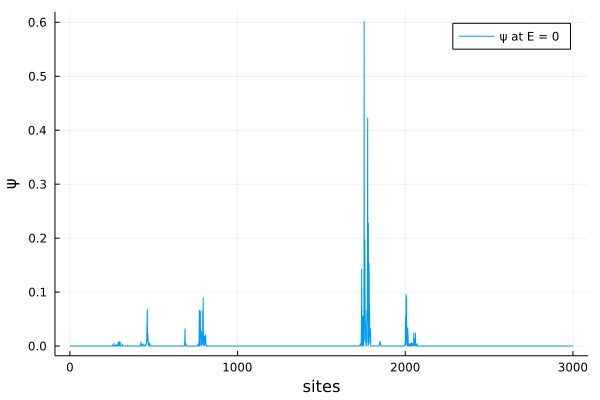

In [44]:
plot((abs.(vecs[:, 1])), label = "ψ at E = 0")
xlabel!("sites")
ylabel!("ψ")

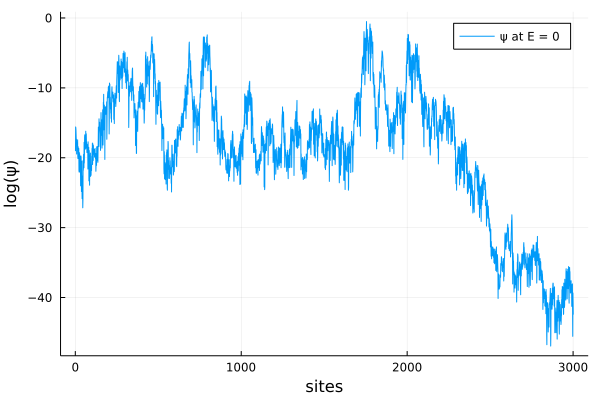

In [45]:
plot(log.(abs.(vecs[:, 1])), label = "ψ at E = 0")
xlabel!("sites")
ylabel!("log(ψ)")

In [46]:
@time begin
    Y = Array(@view H[:, 1])
    A = H[:, 2:end]
    X = A\Y
end

  0.001056 seconds (27 allocations: 891.672 KiB)


3000-element Vector{ComplexF64}:
     -31.886985113963654 - 2.0224174981322304e-8im
      -28.63258275651036 - 1.8160075028664286e-8im
      19.876830710158778 + 1.2292186446798718e-8im
       9.012627573514616 + 5.8965657260344364e-9im
      3.6301953300367953 + 1.4892522582539867e-9im
       5.573988508270922 + 3.408426812198296e-9im
      0.6625195852131426 - 6.787769241350842e-10im
      -2.327659906787678 - 2.123729923200913e-9im
     -2.2182985304338425 + 6.87657148485769e-10im
      -1.409317250326107 - 9.443066449398522e-10im
      1.6534513094642942 + 1.274554239713269e-9im
     -2.7952118627164775 + 2.491574003974012e-9im
       5.053170003905326 - 5.442459506154109e-10im
                         ⋮
 -3.6301281184837573e-19 - 1.652461390360377e-19im
   8.709693898707373e-19 + 3.9624016916332007e-19im
   4.951489565071002e-20 + 2.2538705689198272e-20im
   1.179956311694612e-19 + 5.376598021078773e-20im
  1.1287743942175718e-18 + 5.139318341396536e-19im
   4.189302825019086e-19 

In [47]:
pushfirst!(X, 1)
X.= X*vecs[1, 1]

3001-element Vector{ComplexF64}:
  -7.621312736155875e-10 - 5.2526145306906104e-9im
   2.4302068470436603e-8 + 1.6749004136493416e-7im
   2.1821786667735077e-8 + 1.5039592025188808e-7im
  -1.5148754240008615e-8 - 1.0440532982162563e-7im
    -6.86880530025327e-9 - 4.7339858556839685e-8im
   -2.766685382531833e-9 - 1.906801674093147e-8im
  -4.2481109430240145e-9 - 2.9278013035043993e-8im
  -5.049268988391167e-10 - 3.479959999640352e-9im
   1.7739823981488983e-9 + 1.222630025051747e-8im
   1.6906346878711285e-9 + 1.1651867093842343e-8im
    1.074084745959375e-9 + 7.402600268135533e-9im
  -1.2601469456486415e-9 - 8.684942374852946e-9im
   2.1303183900447854e-9 + 1.468217044456443e-8im
                         ⋮
  -5.913108544084341e-28 + 2.0327056207452287e-27im
  1.4175038598081843e-27 - 4.876853497803868e-27im
   8.065028252082344e-29 - 2.7726011285310437e-28im
  1.9248380824775088e-28 - 6.6076230181396e-28im
    1.83921155309672e-27 - 6.3207003082431575e-27im
   6.831219825599313e-28 - 

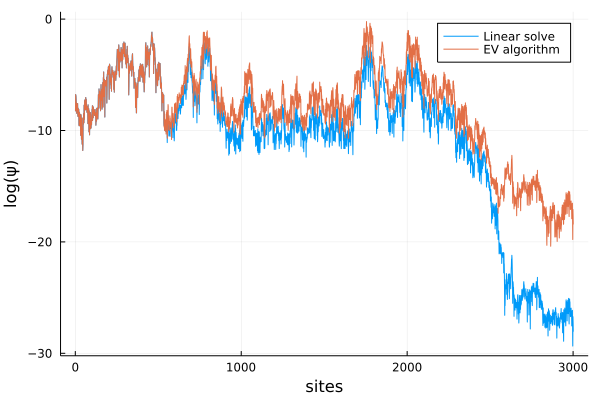

In [48]:
plot(log10.(abs.(X)), label = "Linear solve")
plot!(log10.(abs.(vecs[:, 1])), label = "EV algorithm")
xlabel!("sites")
ylabel!("log(ψ)")

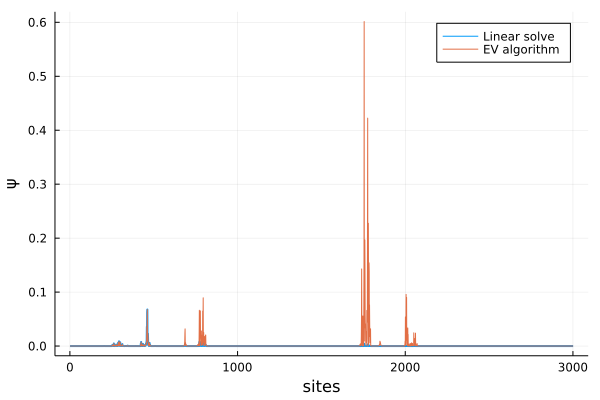

In [49]:
plot(abs.(X), label = "Linear solve", lw = 2)
plot!(abs.(vecs[:, 1]), label = "EV algorithm")
xlabel!("sites")
ylabel!("ψ")